# Load Packages

In [1]:
import numpy as np

from estimation.robust_estimator import SampleMean, TruncatedMean, MedianofMean, CatoniMean, WeaklyRobustMean
from estimation.heavy_tail_observations import WeibullNoise, FrechetNoise, ParetoNoise

# Run Experiments

In [20]:
seed = 20
samples = 10000
steps = 100
noise_type = 'frechet'
both_side = True
p = 1.8
scale = 1.0
mean = 1.0

if noise_type == 'weibull':
    weibull_noise = WeibullNoise(alpha=p, scale=scale,p=p, both_side=both_side)
    nu = (weibull_noise.nu_p**(1./p) + np.abs(mean - weibull_noise.mean))**p
    get_observation = lambda : mean + weibull_noise.sample()
elif noise_type == 'frechet':
    frechet_noise = FrechetNoise(alpha=p+0.1, scale=scale, p=p, both_side=both_side)
    nu = (frechet_noise.nu_p**(1./p) + np.abs(mean - frechet_noise.mean))**p
    get_observation = lambda : mean + frechet_noise.sample()
elif noise_type == 'pareto':
    pareto_noise = ParetoNoise(alpha=p+0.1, scale=scale, p=p, both_side=both_side)
    nu = (pareto_noise.nu_p**(1./p) + np.abs(mean - pareto_noise.mean))**p
    get_observation = lambda : mean + pareto_noise.sample()
    
c_list = [1000000., 10000., 100., 1., 0.01, 0.00001]
    
sample_mean = SampleMean(nu, p)
trunc_mean = TruncatedMean(nu, p, delta=1., schedule=True)
median_mean = MedianofMean(nu,p, delta=1., schedule=True)
catoni_mean = CatoniMean(nu,p, delta=1., schedule=True)
weakly_robust_means = [WeaklyRobustMean(nu, p, c=c) for c in c_list]

sample_mean_error_list = []
trunc_mean_error_list = []
median_mean_error_list = []
catoni_mean_error_list = []
weakly_robust_means_error_list = [[] for c in c_list]

np.random.seed(seed)
for i in range(samples):
    y = get_observation()

    sample_mean.update(y)
    trunc_mean.update(y)
    median_mean.update(y)
    catoni_mean.update(y)
    for weakly_robust_mean in weakly_robust_means:
        weakly_robust_mean.update(y)

    if ((i+1)%steps)==0 or i==0:
        y_hat = sample_mean.predict()
        sample_mean_error_list.append(np.abs(mean-y_hat))
        y_hat = trunc_mean.predict()
        trunc_mean_error_list.append(np.abs(mean-y_hat))
        y_hat = median_mean.predict()
        median_mean_error_list.append(np.abs(mean-y_hat))
        y_hat = catoni_mean.predict()
        catoni_mean_error_list.append(np.abs(mean-y_hat))
        for weakly_robust_mean, weakly_robust_mean_error_list in zip(weakly_robust_means,weakly_robust_means_error_list):
            y_hat = weakly_robust_mean.predict()
            weakly_robust_mean_error_list.append(np.abs(mean-y_hat))
        
print("Noise - {}, Moment - {:.2f}, Nu = {:.2f}".format(noise_type, p, nu))
print("Sample Mean Error : {:.3f}".format(sample_mean_error_list[-1]))
print("Truncated Mean Error : {:.3f}".format(trunc_mean_error_list[-1]))
print("Median of Mean Error : {:.3f}".format(median_mean_error_list[-1]))
print("Catoni's Mean Error : {:.3f}".format(catoni_mean_error_list[-1]))
for c, weakly_robust_mean_error_list in zip(c_list,weakly_robust_means_error_list):
    print("Weakly Robust Mean Error ({:.3f}) : {:.3f}".format(c, weakly_robust_mean_error_list[-1]))    

Noise - frechet, Moment - 1.80, Nu = 24.58
Sample Mean Error : 0.693
Truncated Mean Error : 0.100
Median of Mean Error : 0.333
Catoni's Mean Error : 0.378
Weakly Robust Mean Error (1000000.000) : 0.693
Weakly Robust Mean Error (10000.000) : 0.694
Weakly Robust Mean Error (100.000) : 0.699
Weakly Robust Mean Error (1.000) : 0.341
Weakly Robust Mean Error (0.010) : 0.274
Weakly Robust Mean Error (0.000) : 0.992


In [21]:
from matplotlib import pyplot as plt

(0.0, 0.9)

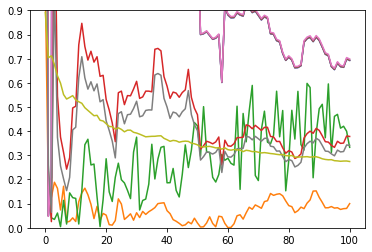

In [29]:
plt.plot(sample_mean_error_list, ms=11, markevery=10)
plt.plot(trunc_mean_error_list, ms=11, markevery=10)
plt.plot(median_mean_error_list, ms=11, markevery=10)
plt.plot(catoni_mean_error_list, ms=11, markevery=10)
for c, weakly_robust_mean_error_list in zip(c_list,weakly_robust_means_error_list):
#     print(weakly_robust_mean_error_list)
    plt.plot(weakly_robust_mean_error_list, ms=11, markevery=10)

plt.ylim([0.0,0.9])